In [1]:
try:
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
print(tf.__version__)

TensorFlow 2.x selected.
2.1.0


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Input, Dropout, BatchNormalization, GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.models import Model

In [3]:
data = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = data.load_data()
x_train, x_test= x_train/255.0, x_test/255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:",x_train.shape)
print("y_train.shape:",y_train.shape)

x_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000,)


In [4]:
K = len(set(y_train))
print("No of classes:", K)

No of classes: 10


In [0]:
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32,(3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64,(3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128,(3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)
model = Model(i,x)

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [0]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs =50)

In [7]:
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
r = model.fit_generator(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 1562 steps, validate on 10000 samples
Epoch 1/50
1562/1562 [==============================] - 32s 20ms/step - loss: 1.4554 - accuracy: 0.4929 - val_loss: 1.1343 - val_accuracy: 0.6093
Epoch 2/50
1562/1562 [==============================] - 28s 18ms/step - loss: 1.0088 - accuracy: 0.6473 - val_loss: 0.9742 - val_accuracy: 0.6647
Epoch 3/50
1562/1562 [==============================] - 29s 19ms/step - loss: 0.8507 - accuracy: 0.7038 - val_loss: 0.8148 - val_accuracy: 0.7230
Epoch 4/50
1562/1562 [==============================] - 29s 18ms/step - loss: 0.7500 - accuracy: 0.7432 - val_loss: 0.7301 - val_accuracy: 0.7532
Epoch 5/50
1562/1562 [==============================] - 29s 18ms/step - loss: 0.6856 - accuracy: 0.7681 - val_loss: 0.7165 - val_accuracy: 0.7633
Epoch 6/50
1562/1562 [==============================] - 29s 19ms/step - loss: 0.6287 - accuracy: 0.7851 - val_loss: 0.669

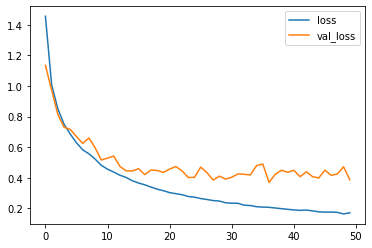

In [8]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

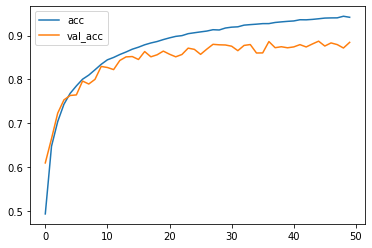

In [9]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[867   9  23  10   9   1   5   3  32  41]
 [  2 953   0   1   0   0   1   0   5  38]
 [ 24   2 857  28  23  23  26   9   1   7]
 [ 11   3  37 760  32  95  32  11   7  12]
 [  5   1  26  24 886  20  22  13   1   2]
 [  3   2  15 101  19 827   5  18   3   7]
 [  4   1  22  27   6  12 924   0   3   1]
 [  8   2  14  25  30  27   1 889   1   3]
 [ 31   7   4   2   4   2   1   0 923  26]
 [  4  25   1   3   0   1   0   1   5 960]]


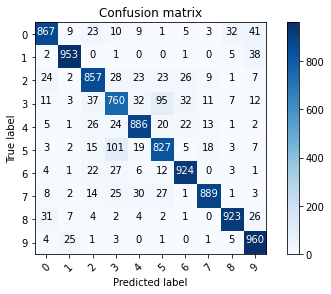

In [10]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [0]:
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

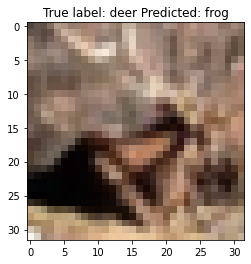

In [29]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

In [30]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496 